# Univariate Analysis
## Objective

This notebook performs systematic univariate analysis to:

- Understand feature distributions

- Detect data quality issues

- Identify skewness, outliers, and rare categories

- Surface early modeling and business risks

- Univariate analysis answers the question:

“What does each variable look like in isolation, and why does that matter?”

## Why Univariate Analysis Matters

Skipping univariate EDA leads to:

- Incorrect scaling assumptions

- Poor feature engineering choices

- Fragile models

- Misinterpretation of coefficients and importance

This notebook treats univariate EDA as a __mandatory gate__ before preprocessing.

# Imports and Configuration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis


# Step 1 – Load or Generate Dataset

For benchmarking consistency, we generate a business-style dataset.

In [10]:
np.random.seed(2010)

N = 5000

df = pd.DataFrame({
    "age": np.random.randint(18, 75, size=N),
    "income": np.random.lognormal(mean=10.8, sigma=0.5, size=N),
    "tenure_years": np.random.exponential(scale=6, size=N),
    "transactions_last_30d": np.random.poisson(lam=4, size=N),
    "region": np.random.choice(
        ["North", "South", "East", "West"],
        size=N,
        p=[0.35, 0.25, 0.25, 0.15]
    ),
    "churn": np.random.binomial(1, 0.28, size=N)
})

df.head()


,age,income,tenure_years,transactions_last_30d,region,churn
0,18,46379.336001,5.749047,4,North,0
1,18,69314.800389,1.537824,5,South,0
2,67,72641.701777,24.502748,3,North,0
3,64,54855.223706,1.502888,3,South,0
4,37,28564.604800,3.950600,6,North,0


# Step 2 – Basic Structural Checks

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5000 non-null   int32  
 1   income                 5000 non-null   float64
 2   tenure_years           5000 non-null   float64
 3   transactions_last_30d  5000 non-null   int32  
 4   region                 5000 non-null   object 
 5   churn                  5000 non-null   int32  
dtypes: float64(2), int32(3), object(1)
memory usage: 175.9+ KB


In [4]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,5000.0,NaN,NaN,NaN,46.1486,16.325753,18.0,32.0,46.0,60.0,74.0
income,5000.0,NaN,NaN,NaN,54894.099028,29083.997028,8176.084898,34569.984947,48191.039131,68165.720462,247723.770145
tenure_years,5000.0,NaN,NaN,NaN,6.026351,6.023036,0.000317,1.715325,4.103798,8.450357,48.157069
transactions_last_30d,5000.0,NaN,NaN,NaN,4.0188,2.001511,0.0,3.0,4.0,5.0,13.0
region,5000,4,North,1773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn,5000.0,NaN,NaN,NaN,0.2818,0.449921,0.0,0.0,0.0,1.0,1.0


## Key Checks

- Data types match business meaning

- No silent object–numeric issues

- Cardinality visible for categorical features

# Step 3 – Numerical Feature Distributions
## Helper Function

In [5]:
def univariate_numeric_summary(series):
    return {
        "mean": series.mean(),
        "median": series.median(),
        "std": series.std(),
        "skewness": skew(series),
        "kurtosis": kurtosis(series),
        "min": series.min(),
        "max": series.max()
    }


## Age

In [6]:
univariate_numeric_summary(df["age"])


{'mean': np.float64(46.1486),
 'median': np.float64(46.0),
 'std': np.float64(16.325753400220677),
 'skewness': np.float64(-0.013047741003565271),
 'kurtosis': np.float64(-1.1771124354969011),
 'min': np.int32(18),
 'max': np.int32(74)}

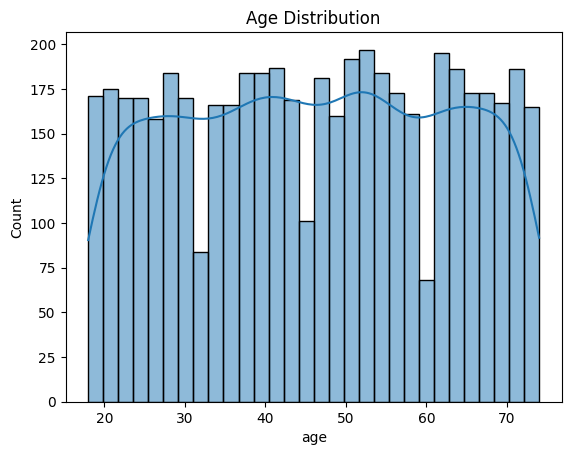

In [7]:
plt.figure()
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


### Interpretation

- Roughly uniform

- Low skew

- No transformation needed

## Income

In [8]:
univariate_numeric_summary(df["income"])


{'mean': np.float64(54894.099028335324),
 'median': np.float64(48191.03913058473),
 'std': np.float64(29083.997028108006),
 'skewness': np.float64(1.5240221972211125),
 'kurtosis': np.float64(3.5477439238891124),
 'min': np.float64(8176.084898493904),
 'max': np.float64(247723.7701453637)}

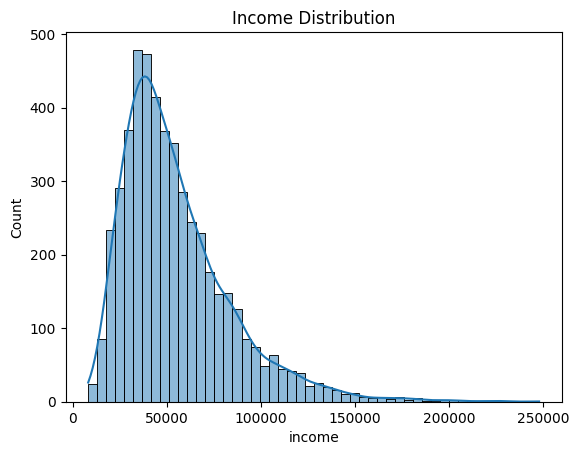

In [9]:
plt.figure()
sns.histplot(df["income"], bins=50, kde=True)
plt.title("Income Distribution")
plt.show()


### Interpretation

- Strong right skew

- Heavy tail

- Candidate for log or Box-Cox transformation

##  Tenure (Years)

In [12]:
univariate_numeric_summary(df["tenure_years"])

{'mean': np.float64(5.881027891752441),
 'median': np.float64(3.988745515874498),
 'std': np.float64(5.9256995545002065),
 'skewness': np.float64(1.9897301979194897),
 'kurtosis': np.float64(6.052825852337609),
 'min': np.float64(0.0013232056847463708),
 'max': np.float64(63.6465128718035)}

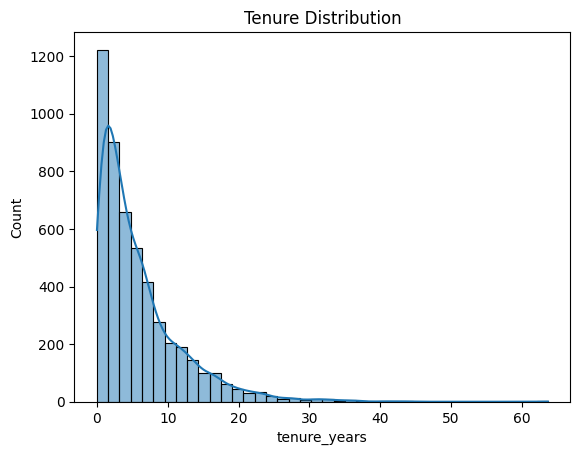

In [11]:
plt.figure()
sns.histplot(df["tenure_years"], bins=40, kde=True)
plt.title("Tenure Distribution")
plt.show()

### Interpretation

- Exponential-like

- Many recent customers

- Long tail of loyal users

## Transactions (Count Variable)

In [13]:
univariate_numeric_summary(df["transactions_last_30d"])


{'mean': np.float64(3.9972),
 'median': np.float64(4.0),
 'std': np.float64(1.9971955132093595),
 'skewness': np.float64(0.5108861568638804),
 'kurtosis': np.float64(0.28754489467429867),
 'min': np.int32(0),
 'max': np.int32(13)}

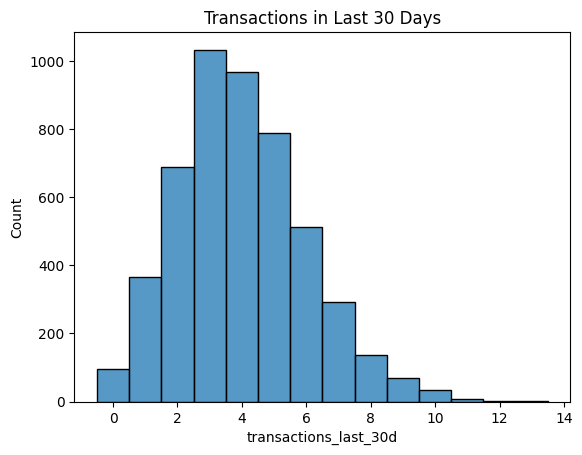

In [14]:
plt.figure()
sns.histplot(df["transactions_last_30d"], discrete=True)
plt.title("Transactions in Last 30 Days")
plt.show()


### Interpretation

- Count data

- Zero-inflation risk

- Poisson-like behavior


## Step 4 – Outlier Diagnostics (Univariate)
### Boxplots

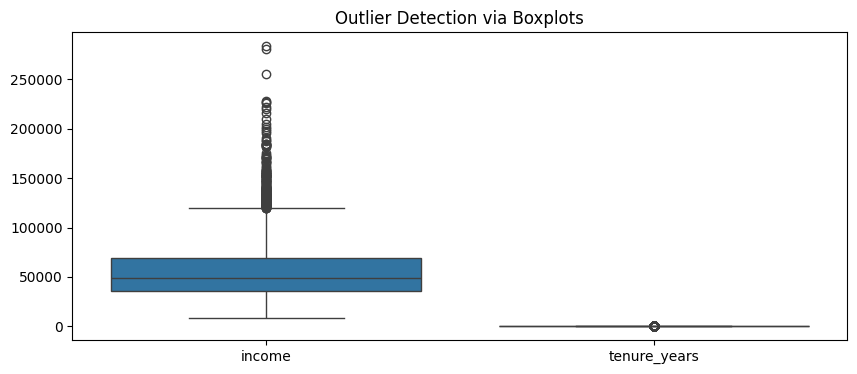

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[["income", "tenure_years"]])
plt.title("Outlier Detection via Boxplots")
plt.show()


### Key Principle

Outliers are:

- Signals to be explained

- Not automatically errors

- Outlier handling decisions must be business-driven.

# Step 5 – Categorical Feature Analysis
##  Region Distribution

In [19]:
df["region"].value_counts(normalize=True)

region
North    0.3522
East     0.2492
South    0.2438
West     0.1548
Name: proportion, dtype: float64

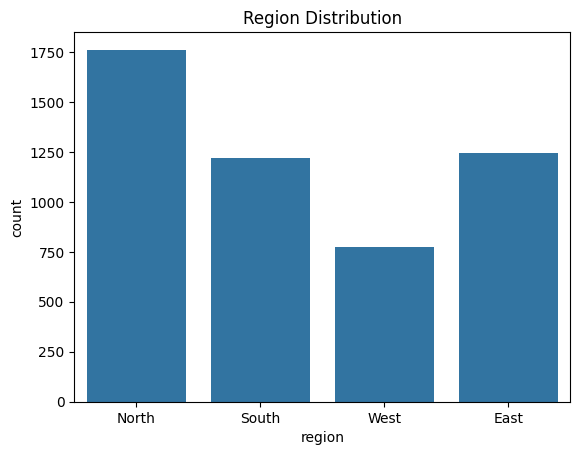

In [18]:
plt.figure()
sns.countplot(x="region", data=df)
plt.title("Region Distribution")
plt.show()


### Interpretation

- Moderate imbalance

- No rare categories

- Safe for one-hot encoding

# Step 6 – Binary Target Distribution

In [20]:
df["churn"].value_counts(normalize=True)

churn
0    0.7236
1    0.2764
Name: proportion, dtype: float64

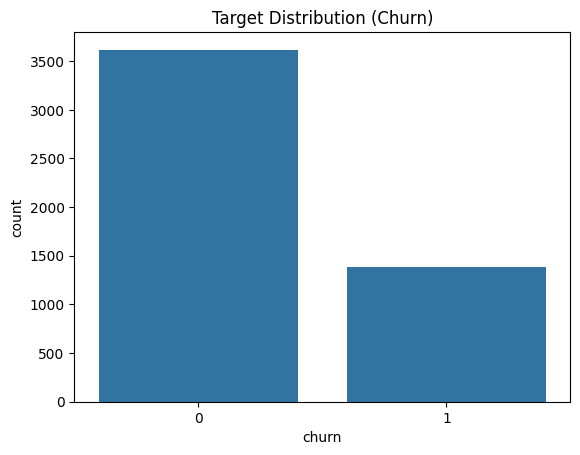

In [21]:
plt.figure()
sns.countplot(x="churn", data=df)
plt.title("Target Distribution (Churn)")
plt.show()


### Interpretation

- Moderate class imbalance (~28%)

- Accuracy alone will be misleading

- ROC-AUC, PR-AUC preferred

# Step 7 – Missing Value Scan

In [22]:
df.isna().mean().sort_values(ascending=False)


age                      0.0
income                   0.0
tenure_years             0.0
transactions_last_30d    0.0
region                   0.0
churn                    0.0
dtype: float64

## Observation

- No missingness in synthetic data

- Real datasets rarely behave this well

- Missingness simulation handled in 00_ folder

# Step 8 – Univariate Risk Assessment Matrix


| Feature      | Risk                  | Mitigation               |
| ------------ | --------------------- | ------------------------ |
| income       | High skew             | Log transform            |
| tenure_years | Long tail             | Robust scaling           |
| transactions | Count & zero-inflated | Binning / Poisson models |
| region       | Mild imbalance        | Standard encoding        |
| churn        | Imbalance             | Proper metrics           |


# Step 9 – Output of Univariate EDA

Deliverables from this notebook:

- Distributional assumptions

- Transformation candidates

- Early bias signals

- Modeling constraints

This notebook feeds directly into:

    02_Data_Preprocessing/
    └── 01_missing_value_handling.ipynb


## Summary

This notebook demonstrated:

- Structured univariate EDA

- Distribution diagnostics

- Outlier interpretation

- Feature-specific risks

- Business-aware conclusions

Univariate analysis is not optional.

It is the foundation of trustworthy data science.